In [10]:
import jax
import jax.numpy as jnp
import optax
from jax import random, grad, value_and_grad
from jax import nn

import numpy as np
import os
import dill

from lib.lib_ARFF import (
    Functions,
    ARFFHyperparameters,
    ARFFTrain,
    nll_loss
)

from lib.plot_lib import (
    PlotResults
)

PR = PlotResults(Functions)

print(jax.devices())
print(jnp.sin(jnp.pi/2))

%load_ext autoreload
%autoreload 2

[CudaDevice(id=0)]
1.0
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
data_name = 'SPY'
training_data = np.load(f"training_data/{data_name}.npz")

trajectories = training_data["trajectories"]
D = trajectories.shape[1]
diff_type = "diagonal"
trajectory_step_size = 1

print(trajectories.shape)


(1, 1, 8182)


In [12]:
# ex_name = "ex4-3D_spd"

# # load true functions
# with open(f"true_functions/{ex_name}.pkl", "rb") as f:
#     true_functions = dill.load(f)

# true_drift = true_functions["drift"]
# true_diffusion = true_functions["diffusion"]

# # load data
# data_name = f"{ex_name}_time0.01_SS0.01_ntraj10000"
# training_data = np.load(f"training_data/{data_name}.npz")

# diff_type = str(training_data["diff_type"])
# trajectory_step_size = training_data["step_size"]
# trajectories = training_data["trajectories"]
# D = trajectories.shape[1]

# print(trajectories.shape)

In [13]:
# subsample data
h = 1
sampled_trajectories = trajectories[:, :, ::int(h/trajectory_step_size)]

x_data = sampled_trajectories[:, :, :-1].reshape(-1, D)
y_data = sampled_trajectories[:, :, 1:].reshape(-1, D)

#step_sizes = np.zeros((x_data.shape[0], 1)) + step_size

key = random.PRNGKey(0)

print(x_data.shape)

(8181, 1)


In [14]:
# ARFF parameters
val_split = 0.1
ARFF_val_split = 0.1

drift_hyperparam = ARFFHyperparameters(K=2**7,
                                        M_min=10,
                                        M_max=500,
                                        lambda_reg=2e-8,
                                        gamma=1,
                                        delta=0.01,
                                        name='drift')
diff_hyperparam = ARFFHyperparameters(K=drift_hyperparam.K,
                                       M_min=drift_hyperparam.M_min,
                                       M_max=drift_hyperparam.M_max,
                                       lambda_reg=drift_hyperparam.lambda_reg,
                                       gamma=drift_hyperparam.gamma,
                                       delta=drift_hyperparam.delta,
                                       name='diffusion')


drift epoch: 11


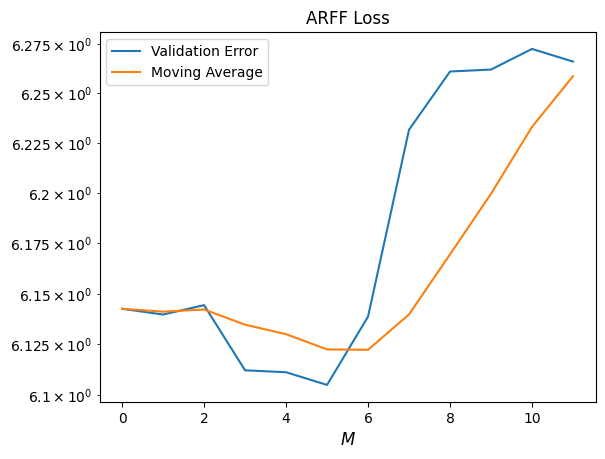

False
diffusion epoch: 10


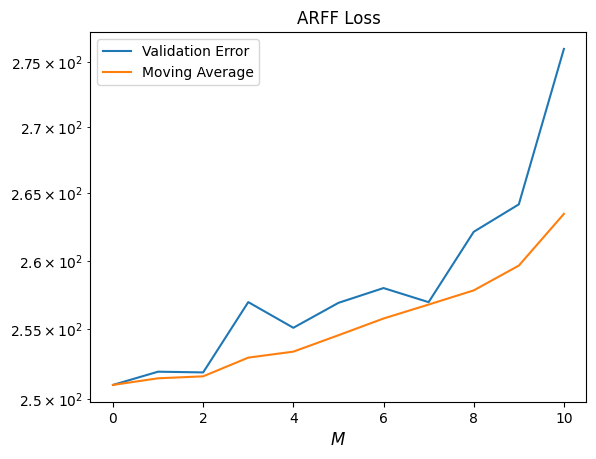

loss = 1.8284, val_loss = 1.7961, time = 0.7882s


In [15]:
# train ARFF
ARFF = ARFFTrain(resampling=True, metropolis_test=True)

drift_param, diff_param, time, loss, val_loss, z, Sigma = ARFF.train_model(key, drift_hyperparam, diff_hyperparam, x_data, y_data, h, val_split=val_split, ARFF_val_split=ARFF_val_split, diff_type=diff_type)


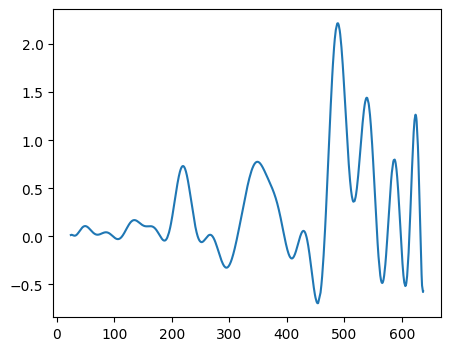

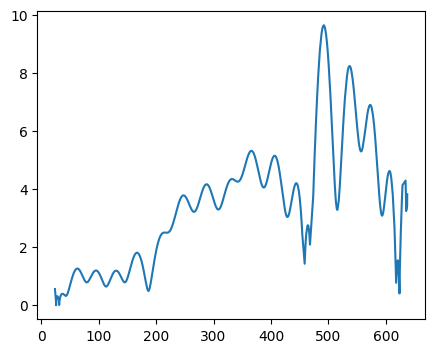

1.8251736691594582
(256, 1)


In [16]:
PR.plot_train_v_true(drift_param, x_data)
PR.plot_train_v_true(diff_param, x_data, diff_type=diff_type)
print(nll_loss(drift_param, diff_param, x_data, y_data, h, diff_type))
print(drift_param["amp"].shape)

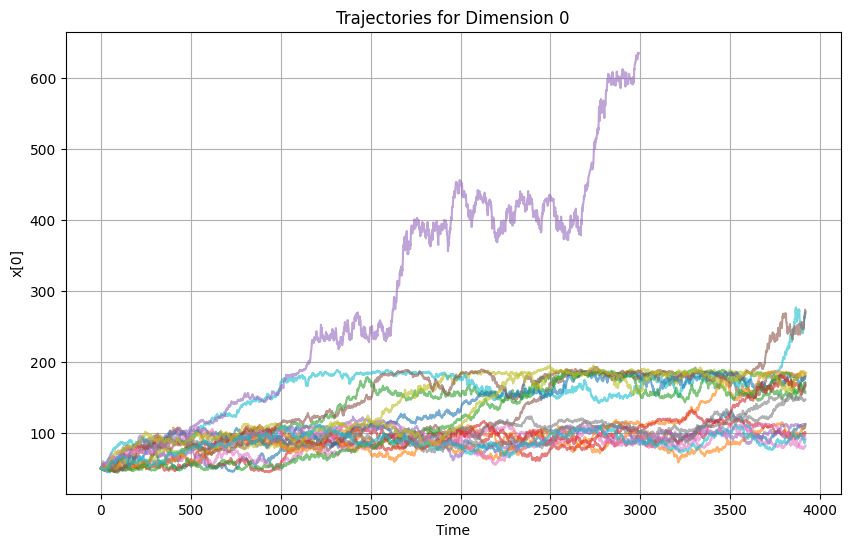

Array([[[ 50.        ,  49.16962981,  50.12214382, ..., 110.1044095 ,
         111.39692044, 112.53561851]],

       [[ 50.        ,  51.06327749,  51.26951848, ..., 108.90868409,
         108.36859542, 108.86781521]],

       [[ 50.        ,  50.5236407 ,  51.18240659, ..., 156.50525251,
         156.29234754, 157.68180441]],

       ...,

       [[ 50.        ,  50.36587818,  50.54615621, ..., 171.14644237,
         170.52676802, 170.70983948]],

       [[ 50.        ,  51.39722108,  51.10422992, ..., 184.62632918,
         184.30273663, 184.14328258]],

       [[ 50.        ,  51.17097846,  50.8266638 , ...,  90.02486947,
          89.36246391,  90.01263346]]], dtype=float64)

In [8]:
x_domain = np.array([[50, 50]])
xlim = np.array([[min(x_data), max(x_data)]])

n_trajectories = 20
trajectory_time = 3918
step_size = 1

PR.plot_trajectories(drift_param, diff_param, x_domain, xlim, n_trajectories, trajectory_time, h, diff_type)

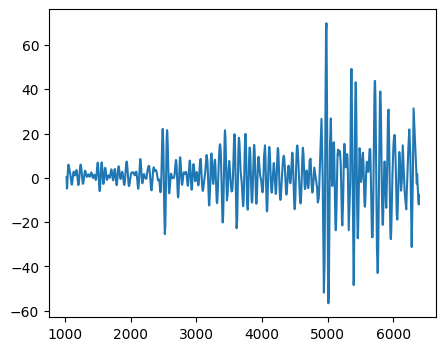

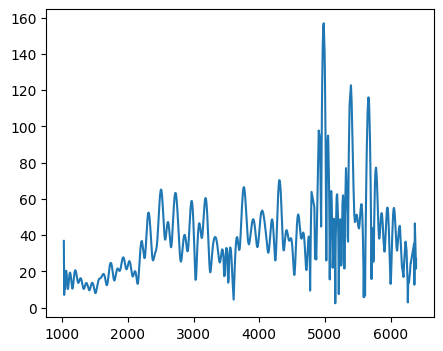

In [70]:
PR.plot_train_v_true(drift_param, x_data)
PR.plot_train_v_true(diff_param, x_data, diff_type=diff_type)

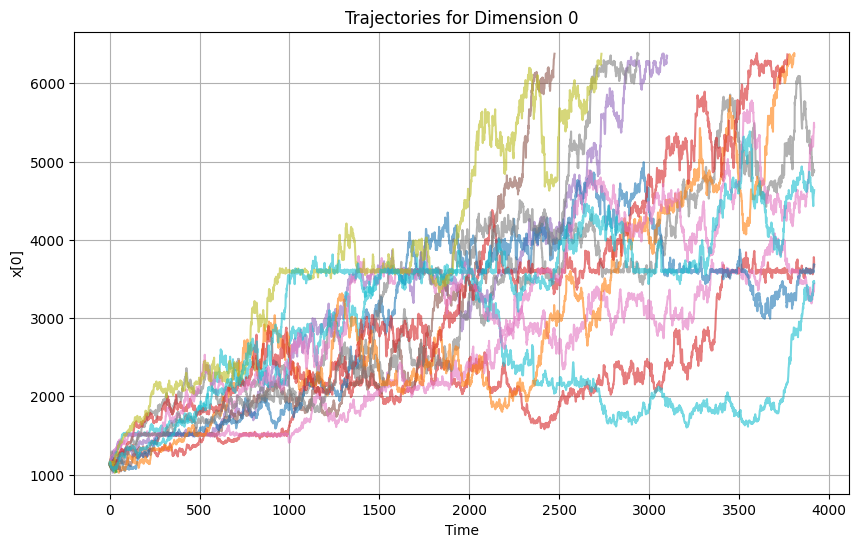

Array([[[1133.        , 1113.17761344, 1138.85271729, ...,
                   nan,           nan,           nan]],

       [[1133.        , 1158.7671849 , 1162.18421451, ...,
                   nan,           nan,           nan]],

       [[1133.        , 1145.77542819, 1156.12022453, ...,
                   nan,           nan,           nan]],

       ...,

       [[1133.        , 1141.97729517, 1145.03769187, ...,
                   nan,           nan,           nan]],

       [[1133.        , 1166.80687765, 1163.08605898, ...,
                   nan,           nan,           nan]],

       [[1133.        , 1161.36008616, 1156.78450919, ...,
         4620.27194192, 4605.94048115, 4634.39130492]]], dtype=float64)

In [71]:
x_domain = np.array([[1133, 1133]])
xlim = np.array([[min(x_data), max(x_data)]])

n_trajectories = 20
trajectory_time = 3918
step_size = 1

PR.plot_trajectories(drift_param, diff_param, x_domain, xlim, n_trajectories, trajectory_time, h, diff_type)

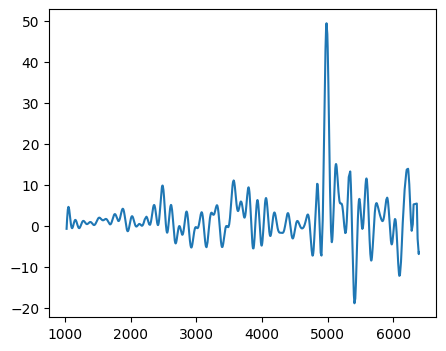

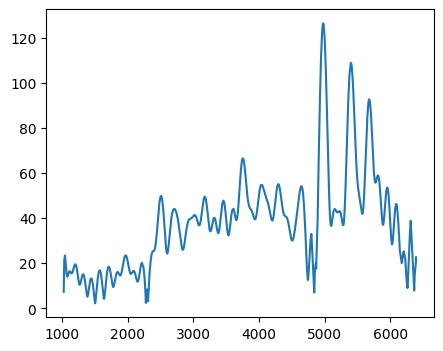

In [62]:
PR.plot_train_v_true(drift_param, x_data)
PR.plot_train_v_true(diff_param, x_data, diff_type=diff_type)

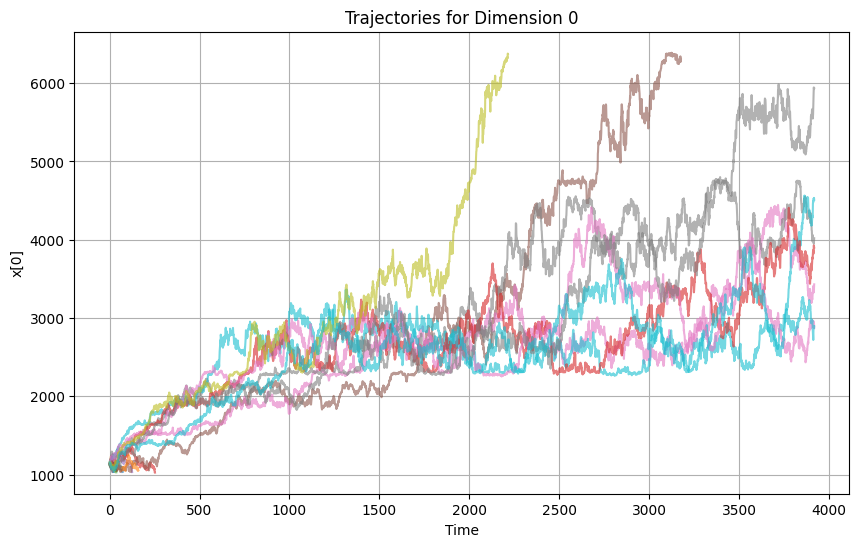

Array([[[1133.        , 1111.52791329, 1133.85730914, ...,
                   nan,           nan,           nan]],

       [[1133.        , 1156.11358614, 1159.68940974, ...,
                   nan,           nan,           nan]],

       [[1133.        , 1143.40791254, 1156.64365171, ...,
                   nan,           nan,           nan]],

       ...,

       [[1133.        , 1139.69341577, 1142.31726361, ...,
         5944.72678265, 5923.57988055, 5931.52294607]],

       [[1133.        , 1163.97624199, 1156.70535153, ...,
                   nan,           nan,           nan]],

       [[1133.        , 1158.64939079, 1150.44520746, ...,
         2897.46144865, 2871.93813499, 2890.91187359]]], dtype=float64)

In [63]:
x_domain = np.array([[1133, 1133]])
xlim = np.array([[min(x_data), max(x_data)]])

n_trajectories = 20
trajectory_time = 3918
step_size = 1

PR.plot_trajectories(drift_param, diff_param, x_domain, xlim, n_trajectories, trajectory_time, h, diff_type)

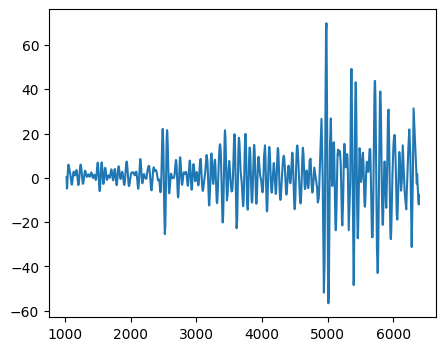

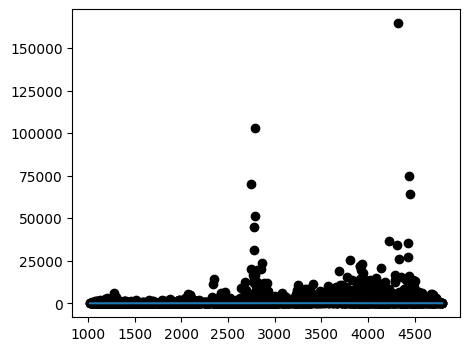

[[2.03232261e-06]
 [7.57493169e-05]
 [4.52902200e-04]
 ...
 [7.51098353e+04]
 [1.02864365e+05]
 [1.64676664e+05]]


In [11]:
plot_train_v_true(drift_param, x_data)
plot_train_v_true(diff_param, x_data, diff_type=diff_type, z=Sigma)
print(np.sort(Sigma, axis=0))

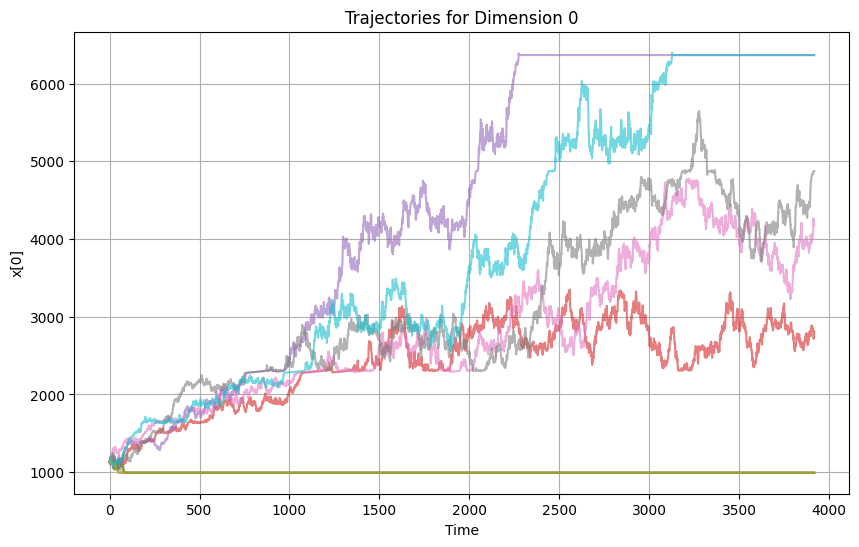

Array([[[1133.        , 1111.52791329, 1098.64095621, ...,
          993.29916816,  993.29916834,  993.2991685 ]],

       [[1133.        , 1156.11358614, 1163.93359653, ...,
          993.29916855,  993.29916803,  993.29916823]],

       [[1133.        , 1143.40791254, 1136.07339769, ...,
          993.29916774,  993.2991683 ,  993.29916892]],

       ...,

       [[1133.        , 1152.83334738, 1160.32843858, ...,
         4875.15271656, 4875.78754111, 4873.69754957]],

       [[1133.        , 1111.06095674, 1142.22106658, ...,
          993.29916842,  993.29916793,  993.29916842]],

       [[1133.        , 1151.51595503, 1177.83621487, ...,
         6366.23062224, 6366.23062207, 6366.23062229]]], dtype=float64)

In [43]:
x_domain = np.array([[1133, 1133]])

n_trajectories = 10
trajectory_time = 3918
step_size = 1

plot_trajectories(drift_param, diff_param, x_domain, n_trajectories, trajectory_time, h, diff_type)

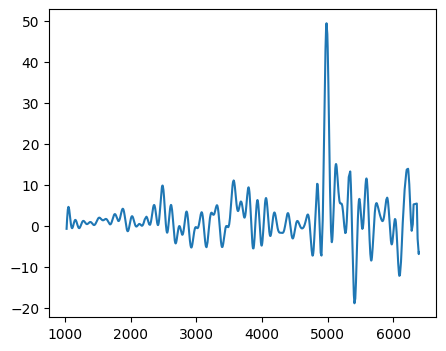

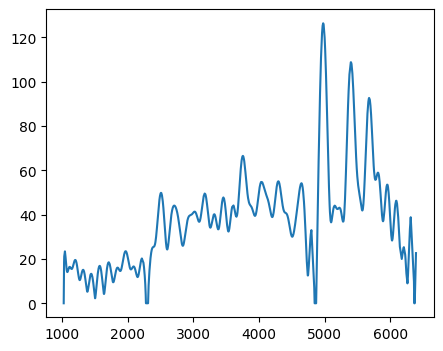

In [41]:
plot_train_v_true(drift_param, x_data)
plot_train_v_true(diff_param, x_data, diff_type=diff_type)

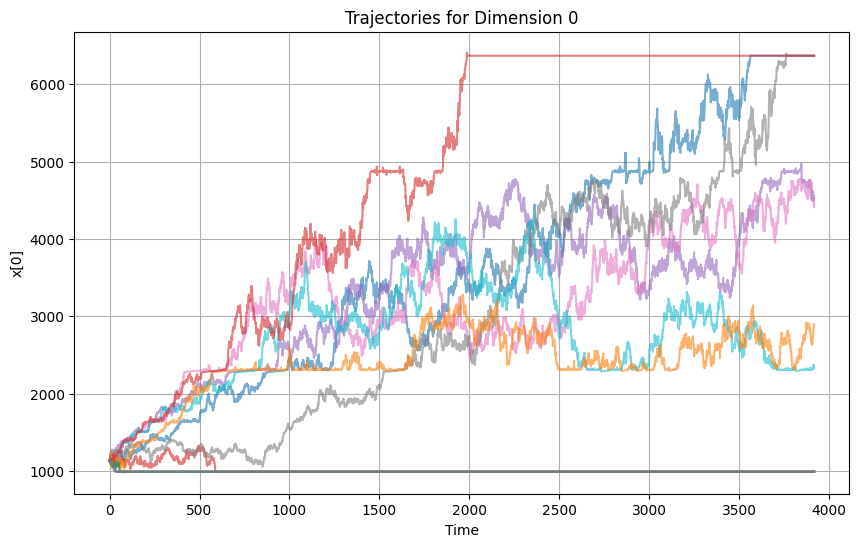

Array([[[1133.        , 1111.52791329, 1109.39638691, ...,
         6366.23062166, 6366.2306217 , 6366.23062246]],

       [[1133.        , 1156.11358614, 1172.07285831, ...,
          993.29916831,  993.29916857,  993.29916849]],

       [[1133.        , 1143.40791254, 1150.55055251, ...,
          993.29916813,  993.29916849,  993.29916829]],

       ...,

       [[1133.        , 1124.9687445 , 1147.28695872, ...,
          993.2991684 ,  993.29916826,  993.29916825]],

       [[1133.        , 1140.04984241, 1149.4538478 , ...,
         6366.23062267, 6366.23062166, 6366.23062164]],

       [[1133.        , 1138.77095032, 1154.32145902, ...,
          993.29916794,  993.29916831,  993.29916878]]], dtype=float64)

In [42]:
x_domain = np.array([[1133, 1133]])

n_trajectories = 15
trajectory_time = 3918
step_size = 1

plot_trajectories(drift_param, diff_param, x_domain, n_trajectories, trajectory_time, h, diff_type)

In [17]:

np.savez(f"saved_results/param/{data_name}_ARFF.npz", drift_param=drift_param, diff_param=diff_param, diff_type=diff_type, times=time, losses=loss, val_losses=val_loss)
